# Capstone project 1: House prices advanced regression

## Machine Learning - Xgboost Model

In [9]:
import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
# Load training and testing data
X_train = pd.read_csv('./dummy_data/X_train.csv',index_col=0).drop('SoldTime',axis=1)
X_test = pd.read_csv('./dummy_data/X_test.csv',index_col=0).drop('SoldTime',axis=1)
y_train = pd.read_csv('./dummy_data/y_train.csv',index_col=0,header = None)
y_test = pd.read_csv('./dummy_data/y_test.csv',index_col=0,header = None)

In [12]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 318), (438, 318), (1022, 1), (438, 1))

### Fine Tuning Models

In [13]:

def plot_accuracy(train_score,test_score,step):# Plot model accuracy

    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(1,2,1)
    plt.plot(np.arange(1,10)*step, train_score)
    plt.ylabel('r2 of training')
    plt.xlabel('Training')
    ax = fig.add_subplot(1,2,2)
    plt.plot(np.arange(1,10)*step, test_score)
    plt.xlabel('Testing')

In [14]:
params = [] # to store all best training and testing score
scores = [] # store the best accuracy
experiment = [] # store the parameter name that is going to experiment

Text(0.5, 1.0, 'n_estimators')

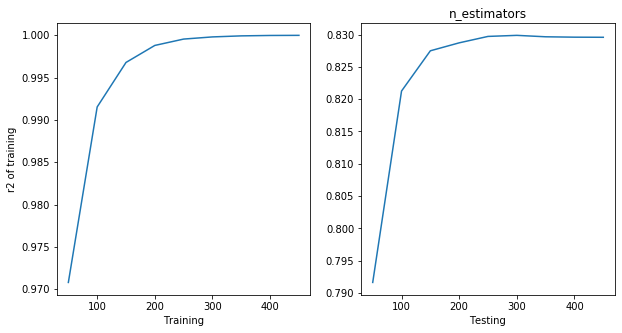

In [15]:
# investigate parameter n_estimator
test_score = []
train_score = []

step=50
name = 'n_estimators'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
             n_estimators=step*n, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.4, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))
    
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,step) # 350 would be sufficient
plt.title(name)

Text(0.5, 1.0, 'reg_lambda')

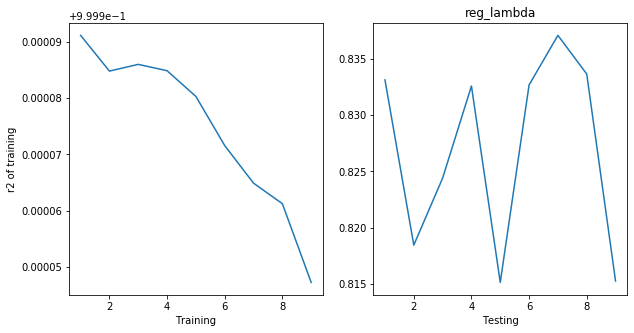

In [16]:
# lambda
name = 'reg_lambda'
test_score = []
train_score = []
step = 0.1
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=n*step, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.4, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))


best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,1) # 7 would be good
plt.title(name) 

Text(0.5, 1.0, 'Learning Rate')

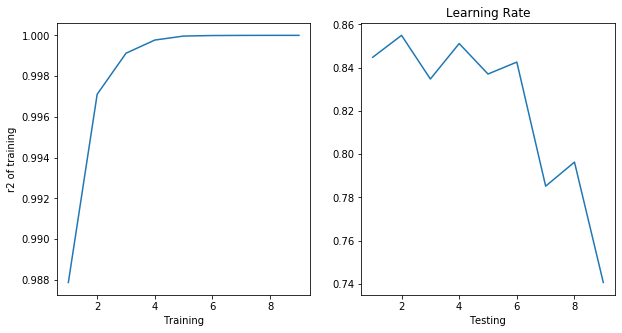

In [17]:
# Learning_rate:
step = 0.02
test_score = []
train_score = []
name = 'Learning Rate'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=n*step,
             max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.7, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.4, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,1) # 2-6 would be good
plt.title(name) 

Text(0.5, 1.0, 'max_depth')

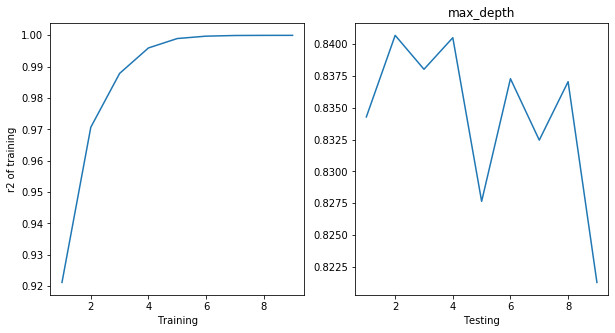

In [18]:
# max_depth
step=1
test_score = []
train_score = []
name = 'max_depth'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=n, min_child_weight=1, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.7, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.4, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))

best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,1) # 2-4 would be good,choose 4
plt.title(name) 

Text(0.5, 1.0, 'subsample')

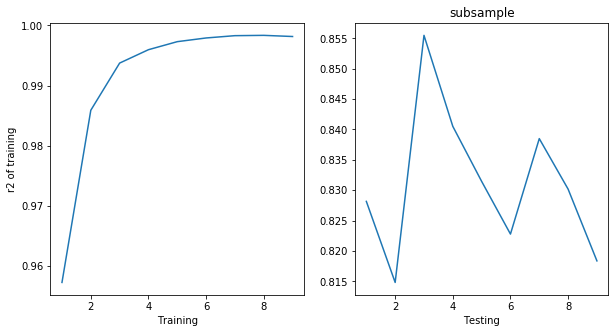

In [19]:
# subsample
step = 0.1
test_score = []
train_score = []
name = 'subsample'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.7, scale_pos_weight=1, seed=None, silent=None,
             subsample=n*step, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))
    
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,1) # 3 is best
plt.title(name) 

Text(0.5, 1.0, 'colsample_bytree')

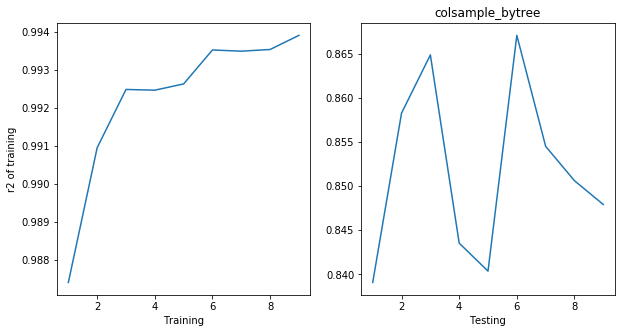

In [20]:
# colsample_bytree
step=0.1
test_score = []
train_score = []
name = 'colsample_bytree'
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=n*step, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.7, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.3, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))
    
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,1) # 6 would be good
plt.title(name)

Text(0.5, 1.0, 'min_child_weight')

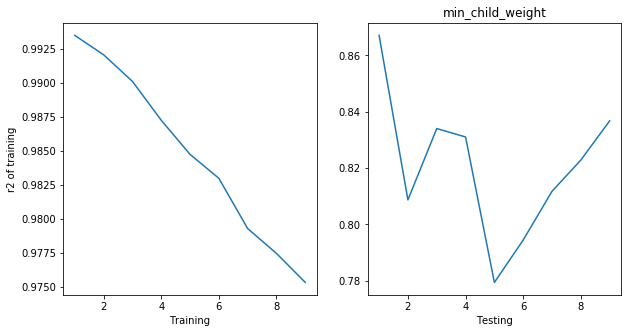

In [21]:
# min_child_weight
name = 'min_child_weight'
step = 1
test_score = []
train_score = []
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=n, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=0.7, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.3, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))
    
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,1) # 1 is best
plt.title(name) 

Text(0.5, 1.0, 'reg_alpha')

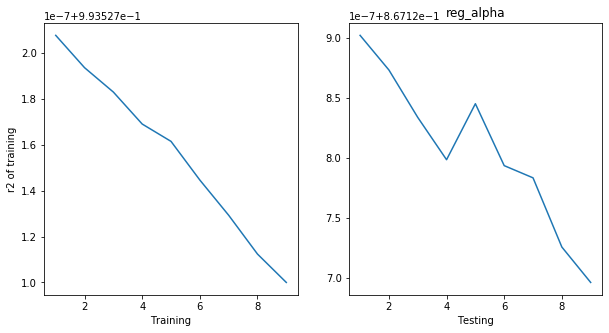

In [22]:
# lambda
name = 'reg_alpha'
test_score = []
train_score = []
step = 0.1
for n in range(1,10):
    model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=n*step,
             reg_lambda=0.7, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.3, verbosity=1)
    model.fit(X_train,y_train)
    train_score.append(r2_score(model.predict(X_train),y_train))
    test_score.append(r2_score(model.predict(X_test),y_test))
    
best_train_param = train_score.index(max(train_score))*step
best_train_score = max(train_score)
best_test_param = test_score.index(max(test_score))*step
best_test_score = max(test_score)

params.append((best_train_param,best_test_param))
scores.append((best_train_score,best_test_score))
experiment.append(name)

plot_accuracy(train_score,test_score,1) # 1 is best 
plt.title(name) 

In [23]:
experiment_doc = pd.DataFrame(list(zip(experiment,params,scores)),\
                              columns=['parameter_name','best_parameter(train,test)','best_score(train,test)'])
experiment_doc.to_csv('experiments_doc.csv')


In [24]:
experiment_doc

,parameter_name,"best_parameter(train,test)","best_score(train,test)"
0,n_estimators,"(400, 250)","(0.9999919793623688, 0.8298780870324504)"
1,reg_lambda,"(0.0, 0.6000000000000001)","(0.9999910942060151, 0.8370568163930516)"
2,Learning Rate,"(0.16, 0.02)","(0.9999997755376059, 0.8549319230282041)"
3,max_depth,"(8, 1)","(0.9999711692502472, 0.8406994908798329)"
4,subsample,"(0.7000000000000001, 0.2)","(0.9983406350775134, 0.8554938825140004)"
5,colsample_bytree,"(0.8, 0.5)","(0.9939119993871319, 0.8671209068365484)"
6,min_child_weight,"(0, 0)","(0.9935272204797084, 0.8671209068365484)"
7,reg_alpha,"(0.0, 0.0)","(0.9935272077613521, 0.8671209023340529)"


## Found the best parameters

In [26]:
# save model
print('best_score:{}'.format(experiment_doc.iloc[6]['best_score(train,test)'][1]))


best_score:0.8671209068365484


In [27]:
# Best model for testing accuracy:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=n*step,
             reg_lambda=0.7, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.3, verbosity=1)
model.fit(X_train,y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0.9, reg_lambda=0.7, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.3, verbosity=1)

In [32]:
pickle.dump(model, open("./models/best_model_funeTune.dat", "wb"))

In [34]:

# Additiona search
search_grid = {
    'colsample_bynode':np.arange(0.05,1,0.05),
    'colsample_bylevel':np.arange(0.05,1,0.05),
    'reg_lambda':np.arange(0,1,0.05),
    'reg_alpha':np.arange(0,1,0.05),
}
model = xgb.XGBRegressor(base_score=0.3, booster='gbtree',
             colsample_bytree=0.45, gamma=0,
             importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=n, missing=None,
             n_estimators= 350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0,
             scale_pos_weight=1, seed=None, silent=None,
             subsample=0.65, verbosity=1)

random_search = RandomizedSearchCV(estimator=model,
                                      param_distributions=search_grid,
                                      scoring= 'r2',
                                      cv=4,
                                      n_iter=10,
                                      verbose=1)
random_search.fit(X_train,y_train)
print('Best score: ', random_search.best_score_)
print('Bset model: ', random_search.best_estimator_)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.3min finished


Best score:  0.8779164724694435
Bset model:  XGBRegressor(base_score=0.3, booster='gbtree',
             colsample_bylevel=0.9000000000000001,
             colsample_bynode=0.8500000000000001, colsample_bytree=0.45,
             gamma=0, importance_type='gain', learning_rate=0.2,
             max_delta_step=0, max_depth=3, min_child_weight=9, missing=None,
             n_estimators=350, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0,
             reg_alpha=0.6000000000000001, reg_lambda=0.5, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.65, verbosity=1)


In [31]:
#Verify modeling fitting using test data

y_test_predict = model.predict(X_test)
r2 = r2_score(y_test,y_test_predict)

print('r2:{}'.format(r2))


r2:0.8928217970452502


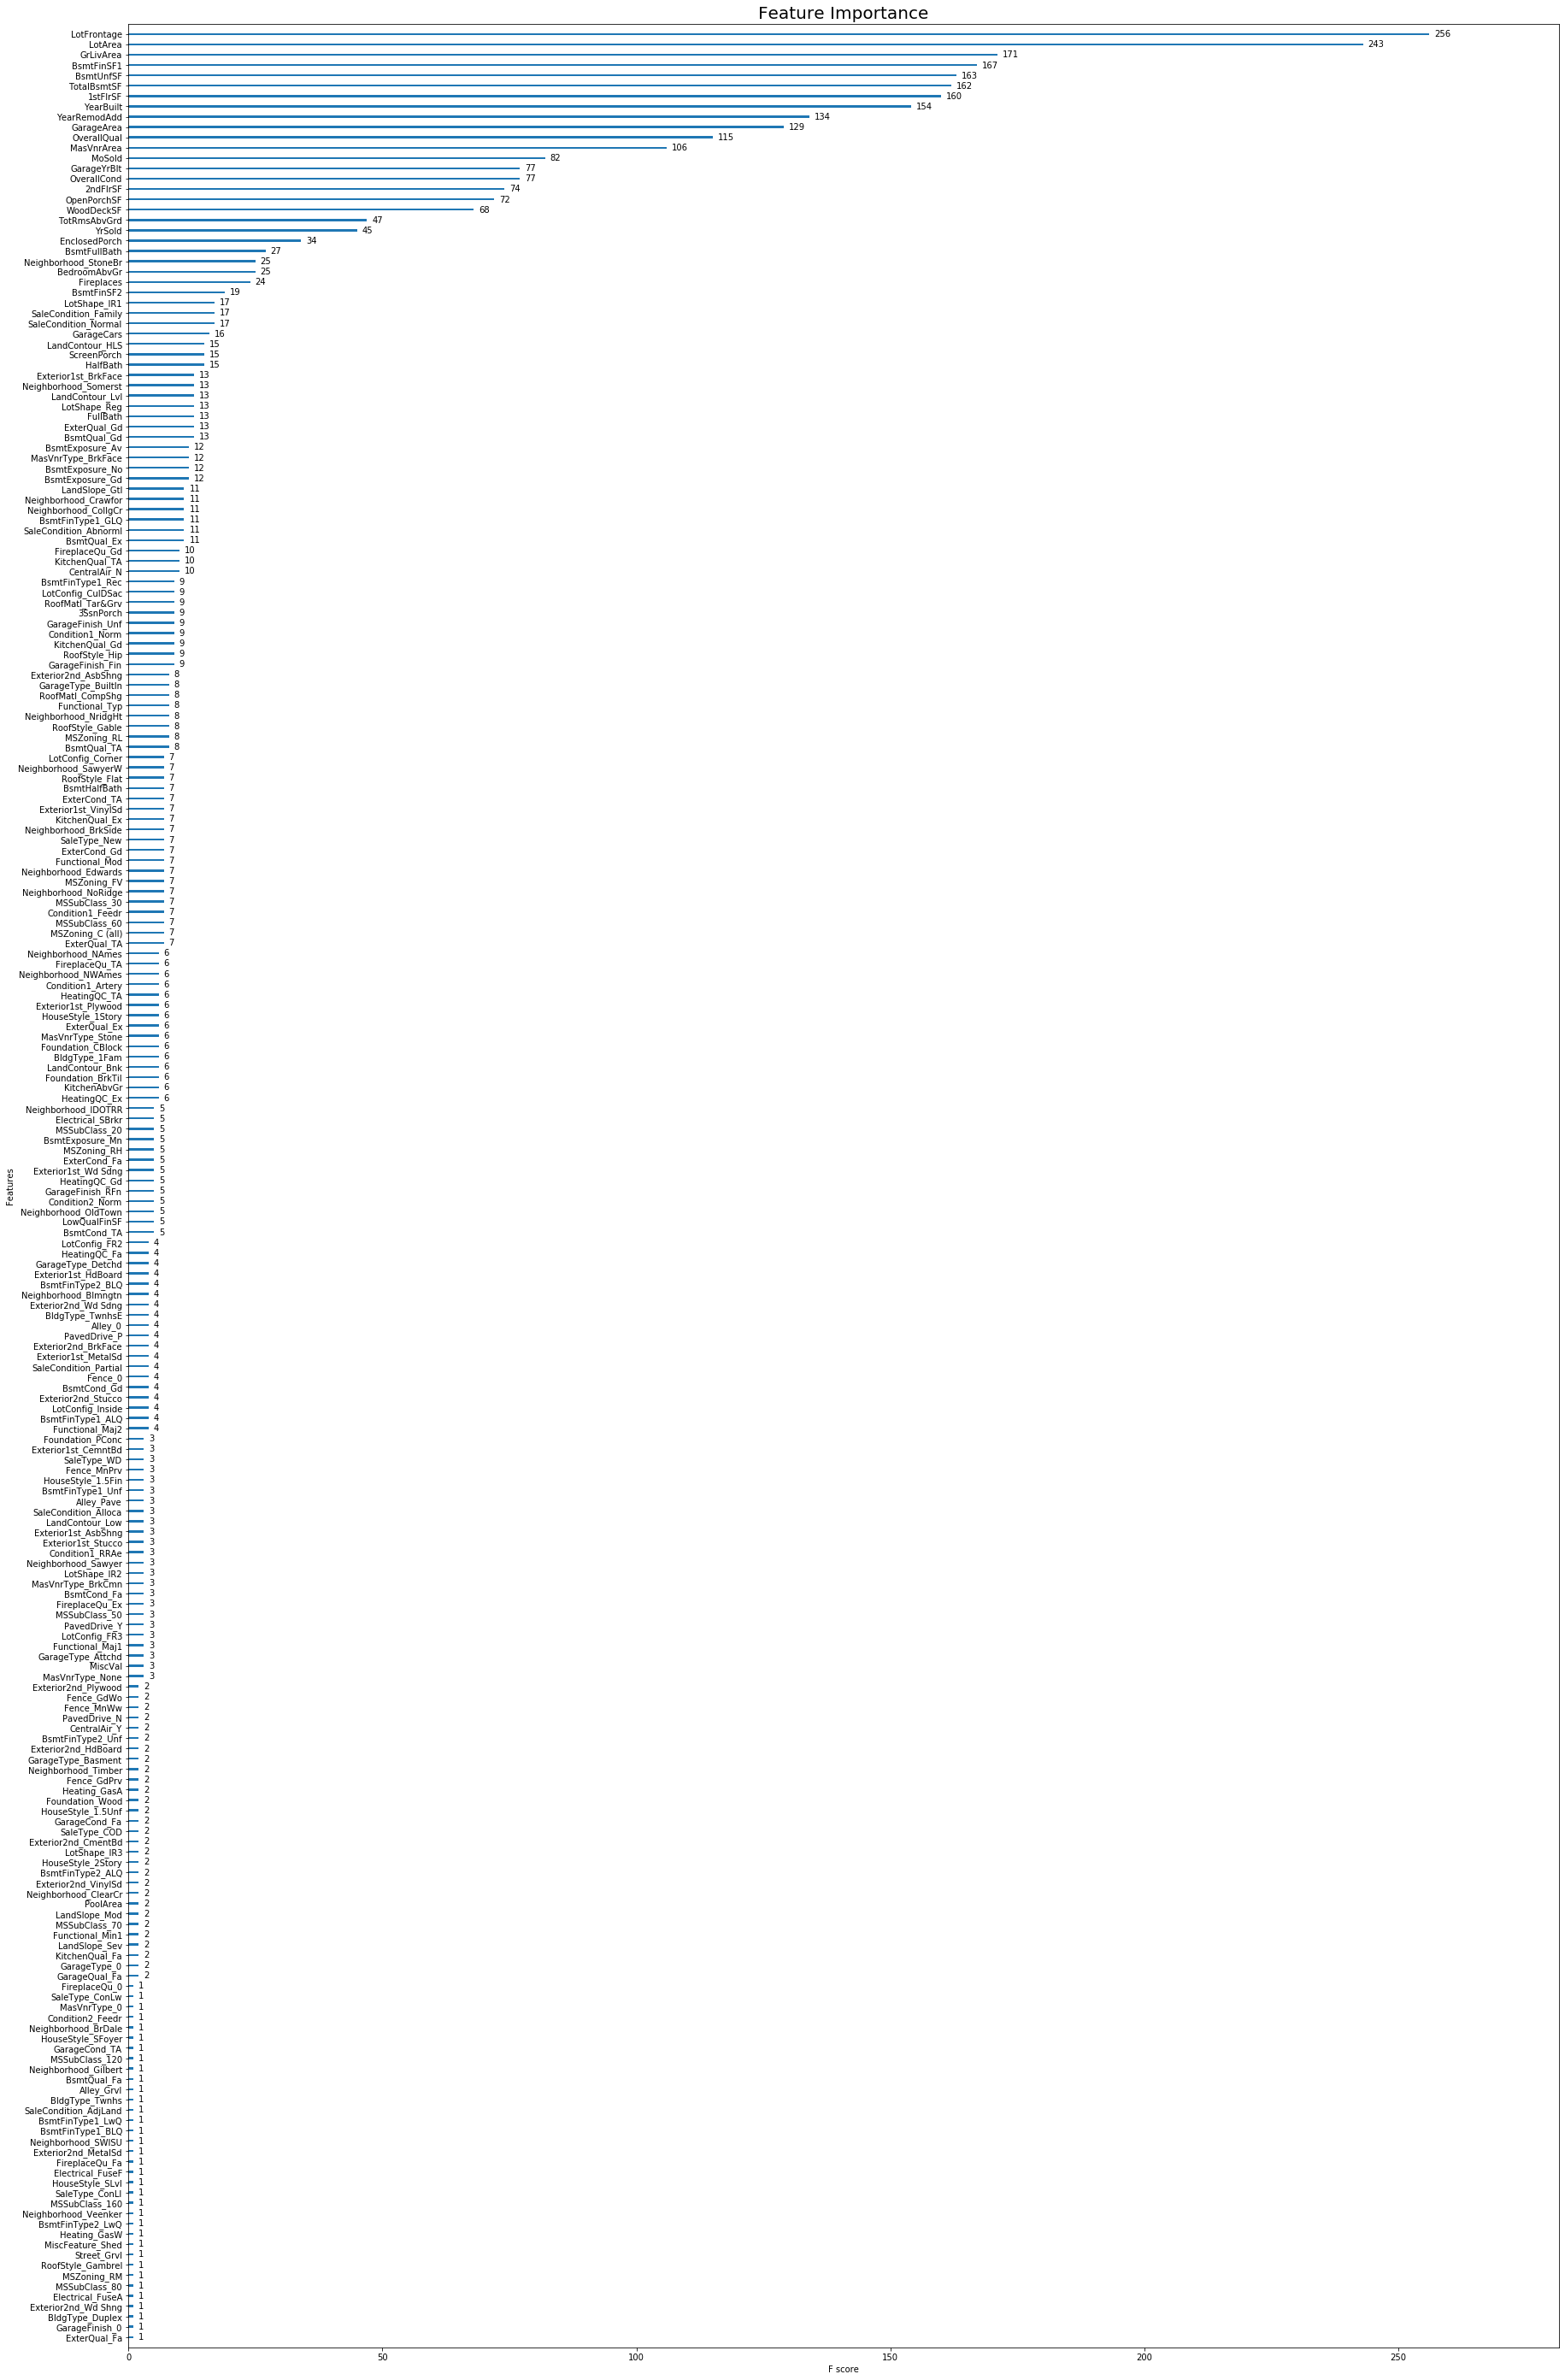

In [28]:
# plot importance
fig, ax = plt.subplots(1,1,figsize=(30,50))

g1 = plot_importance(model,ax=ax,grid=False)

fig.savefig('feature_importance_best.png')
plt.title('Feature Importance',fontsize=20)

plt.show()